
Относительная частота товара:



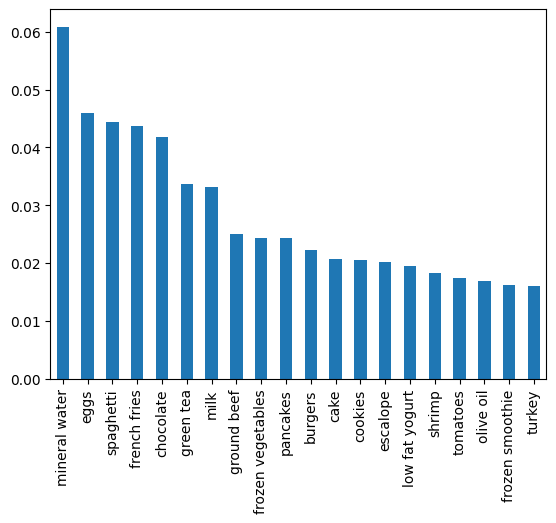


Фактическая частота товара:



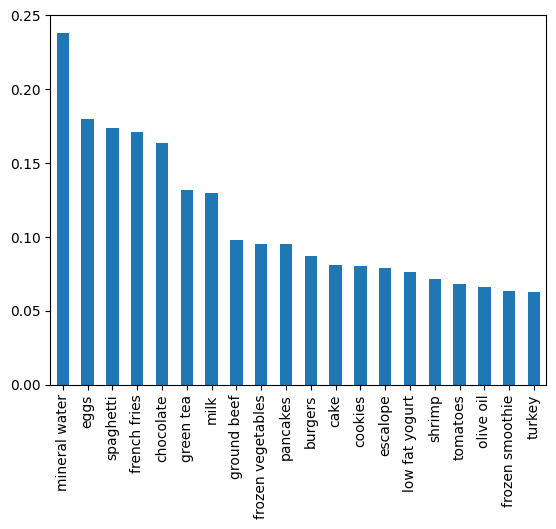

['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes', 'whole weat flour', 'yams', 'cottage cheese', 'energy drink', 'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad', 'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie', 'spinach', 'olive oil']

apriori_python
 [[{'cooking oil'}, {'mineral water'}, 0.39425587467362927], [{'ground beef'}, {'spaghetti'}, 0.3989145183175034], [{'ground beef'}, {'mineral water'}, 0.41655359565807326], [{'olive oil'}, {'mineral water'}, 0.4190283400809717], [{'soup'}, {'mineral water'}, 0.45646437994722955]]

apyori
frozenset({'burgers'}) frozenset({'eggs'})
Support: 0.02879616051193174, Confidence: 0.33027522935779813, Lift: 1.8378297443715457.

frozenset({'cake'}) frozenset({'mineral water'})
Support: 0.027463004932675644, Confidence: 0.33881578947368424, Lift: 1.4213966649005065.

frozenset({'chicken'}) frozenset({'mineral water'})
Support: 0.022796960405279298, Confidence: 0.38000000000000006, Lift: 1.594172259507

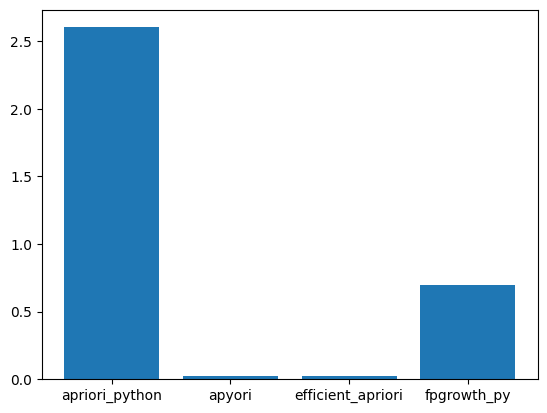


Относительная частота товара:



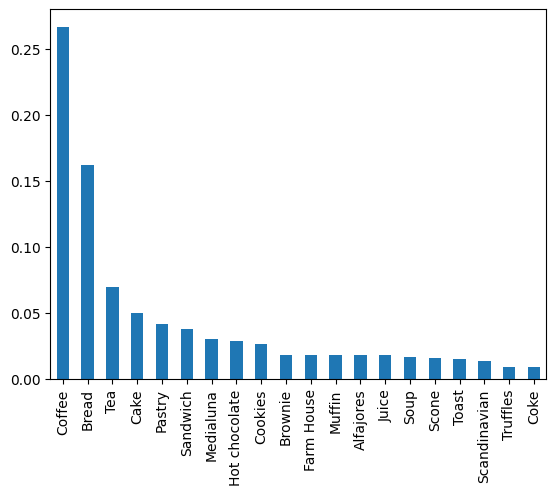


Фактическая частота товара:



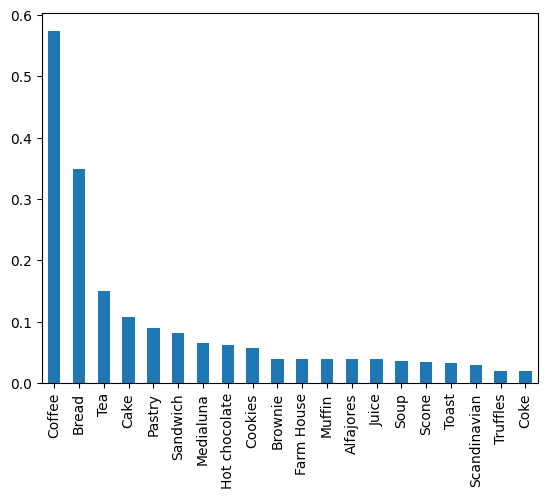

['Bread']

Информация полученная алгоритмом apriori_python
 [[{'Pastry'}, {'Bread'}, 0.33865030674846625], [{'Tea'}, {'Coffee'}, 0.3496296296296296], [{'Hot chocolate'}, {'Coffee'}, 0.5072463768115942], [{'Cookies'}, {'Coffee'}, 0.5184466019417475], [{'Cake'}, {'Coffee'}, 0.5269582909460834], [{'Sandwich'}, {'Coffee'}, 0.5323529411764706], [{'Juice'}, {'Coffee'}, 0.5342465753424658], [{'Pastry'}, {'Coffee'}, 0.5521472392638037], [{'Medialuna'}, {'Coffee'}, 0.5692307692307692], [{'Toast'}, {'Coffee'}, 0.7044025157232704]]

 Информация полученная алгоритмом apyori
frozenset({'Pastry'}) frozenset({'Bread'})
Support: 0.02895813660686182, Confidence: 0.3386503067484663, Lift: 1.0421944054309438.

frozenset({'Cake'}) frozenset({'Coffee'})
Support: 0.054348966530269646, Confidence: 0.5269582909460834, Lift: 1.1091959962471556.

frozenset({'Cookies'}) frozenset({'Coffee'})
Support: 0.028013849543594586, Confidence: 0.5184466019417476, Lift: 1.0912797180006175.

frozenset({'Hot chocolate'}) fro

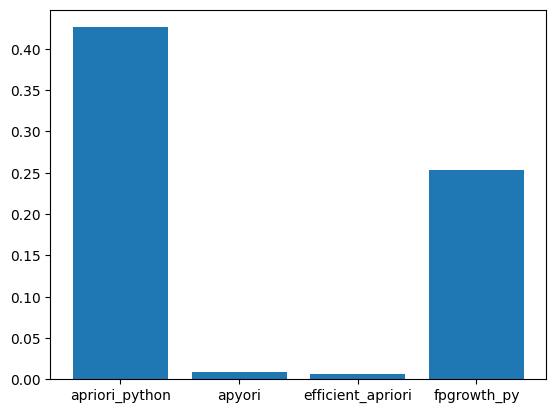

In [1]:
import time
import pandas as pd
import matplotlib.pyplot as plt
from apriori_python import apriori as aprip
from apyori import apriori as apy
from efficient_apriori import apriori as eap
from fpgrowth_py import fpgrowth

def frequency_visualise(df):
    series = df.stack()
    print('\nОтносительная частота товара:\n')
    series.value_counts(normalize=True).head(20).plot(kind='bar')
    plt.show()
    print('\nФактическая частота товара:\n')
    series.value_counts().apply(lambda item: item / df.shape[0]).head(20).plot(kind='bar')
    plt.show()

def set_transactions(df):
    checklist =  []
    for i in range(df.shape[0]):
        row = df.iloc[i].dropna().tolist()
        #row = pd.unique(row)
        checklist.append(row)
    return checklist

def market():
    t = []
    mbo_data = pd.read_csv('Market_Basket_Optimisation.csv', header=None)
    frequency_visualise(mbo_data)
    transactions = set_transactions(mbo_data)
    print(transactions[0])
    start = time.perf_counter()
    t1, rules = aprip(itemSetList=transactions, minSup=0.02, minConf=0.38)
    t.append(time.perf_counter()-start)
    print('\napriori_python\n',rules)

    start = time.perf_counter()
    rules = apy(transactions=transactions, min_support=0.02, min_confidence=0.3, min_lift=1.0001)
    results = list(rules)
    t.append(time.perf_counter()-start)
    print('\napyori')
    for res in results:
        for subset in res[2]:
            print(subset[0], subset[1])
            print("Support: {0}, Confidence: {1}, Lift: {2}.".format(res[1],subset[2],subset[3]))
            print()

    start = time.perf_counter()
    itemsets, rules = eap(transactions=transactions, min_support=0.02, min_confidence=0.3)
    t.append(time.perf_counter()-start)
    print('\nefficient_apriori')
    for rule in rules:
        print(rule)

    start = time.perf_counter()
    itemsets, rules = fpgrowth(itemSetList=transactions, minSupRatio=0.02, minConf=0.3)
    t.append(time.perf_counter()-start)
    print('\nfpgrowth_py')
    for rule in rules:
        print(rule)

    print("Время выполнения алгоритмов:\napriori_python: {}\napyori: {}\nefficient_apriori: {}\nfpgrowth_py: {}"
          .format(t[0],t[1],t[2],t[3]))
    plt.bar(['apriori_python','apyori','efficient_apriori','fpgrowth_py'],t)
    plt.show()

def datacsv():
    t = []
    data = pd.read_csv('data.csv', header=None)
    frequency_visualise(data)
    transactions = set_transactions(data)
    print(transactions[0])
    start = time.perf_counter()
    t1, rules = aprip(itemSetList=transactions, minSup=0.02, minConf=0.3)
    t.append(time.perf_counter()-start)
    print('\nИнформация полученная алгоритмом apriori_python\n',rules)

    start = time.perf_counter()
    rules = apy(transactions=transactions, min_support=0.02, min_confidence=0.38, min_lift=1.0001)
    results = list(rules)
    t.append(time.perf_counter()-start)
    print('\n Информация полученная алгоритмом apyori')
    for res in results:
        for subset in res[2]:
            print(subset[0], subset[1])
            print("Support: {0}, Confidence: {1}, Lift: {2}.".format(res[1],subset[2],subset[3]))
            print()

    start = time.perf_counter()
    itemsets, rules = eap(transactions=transactions, min_support=0.02, min_confidence=0.38)
    t.append(time.perf_counter()-start)
    print('\n Информация полученная алгоритмом efficient_apriori')
    for rule in rules:
        print(rule)

    start = time.perf_counter()
    itemsets, rules = fpgrowth(itemSetList=transactions, minSupRatio=0.02, minConf=0.3)
    t.append(time.perf_counter()-start)
    print('\n Информация полученная алгоритмом fpgrowth_py')
    for rule in rules:
        print(rule)

    print("Время выполнения алгоритмов:\napriori_python: {}\napyori: {}\nefficient_apriori: {}\nfpgrowth_py: {}"
          .format(t[0],t[1],t[2],t[3]))
    plt.bar(['apriori_python','apyori','efficient_apriori','fpgrowth_py'],t)
    plt.show()



if __name__ == '__main__':
    market()
    datacsv()